## 3. Modeling and Results

In this section I will take different approaches towards predicting the emotion of audio files using different machine learning algorithms.

Since my dataset has labels, all of the modelings are supervised learning algorithms.Also, since my target variable is a categorical variable, emotions, including 5 classes, the following modeling algorithms are for classification. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, Dense, Flatten, Dropout

I will import the data from the EDA notebook.

In [2]:
# read the target variable for speech data:
%store -r y_Sp
%store -r target_Sp

In [3]:
# read the features fo speech audio for CNN
%store -r features_speech_CNN

In [4]:
# read the flattened features fo speech audio 
%store -r features_speech_flat  

In [5]:
# read the target variable for song data:
%store -r y_So

In [6]:
# read the flattened features fo song audio 
%store -r features_song_flat

In [7]:
# read the CNN features fo song audio 
%store -r features_song_CNN

Before going into scaling, I need to split my data into test, validation and train set. Since my dataset is not a big one, I decided to use a big percentage of data for training the model.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# doing train, test split for flattened features:

X_train_flat_Sp, X_test_flat_Sp, y_train_flat_Sp, y_test_flat_Sp = train_test_split(features_speech_flat, target_Sp, test_size=0.1, random_state = 20, stratify = y_Sp)

In [10]:
# splitting the validation, train set for flattened features:

X_train_flat_Sp, X_val_flat_Sp, y_train_flat_Sp, y_val_flat_Sp = train_test_split(X_train_flat_Sp, y_train_flat_Sp, test_size=0.2, random_state = 20, stratify =y_train_flat_Sp )

In [11]:
# printing the shape of flattened speech features:

print(np.shape(X_train_flat_Sp))
print(np.shape(X_val_flat_Sp))
print(np.shape(X_test_flat_Sp))

(691, 384)
(173, 384)
(96, 384)


As we can see, our train set had 691 rows and 384 columns.

Now I should do the train, test split for CNN features:

In [12]:
# doing train, test split for flattened features:

X_train_CNN_Sp, X_test_CNN_Sp, y_train_CNN_Sp, y_test_CNN_Sp = train_test_split(features_speech_CNN, y_Sp, test_size=0.1, random_state = 20, stratify = y_Sp)

In [13]:
# doing train, test split for flattened features:

X_train_CNN_Sp, X_val_CNN_Sp, y_train_CNN_Sp, y_val_CNN_Sp = train_test_split(X_train_CNN_Sp, y_train_CNN_Sp, test_size=0.2, random_state = 20, stratify = y_train_CNN_Sp)

In [14]:
# printing the shape of flattened speech features:

print(np.shape(X_train_CNN_Sp))
print(np.shape(X_val_CNN_Sp))
print(np.shape(X_test_CNN_Sp))

(691, 3, 128)
(173, 3, 128)
(96, 3, 128)


The train set that is going to be fed into CNN model has 3 dimension as discussed in EDA notebook.

### 3.1 scaling data

Now that our datasets are ready, we can scale them. Based on previous research, standard scaling has a better performance for audio data and is commonly used for this type of data.

In a draft notebook, I have also tried MinMax scaler and came to the same conclusion that standard scaler works better.

In [15]:
# scaling the flattened feature:
ss = StandardScaler()


X_train_flat_Sp_ss = ss.fit_transform(X_train_flat_Sp)
X_val_flat_Sp_ss = ss.transform(X_val_flat_Sp)
X_test_flat_Sp_ss = ss.transform(X_test_flat_Sp)

In [16]:
# to have a container for scaled dataset:

X_train_CNN_Sp_ss = X_train_CNN_Sp.copy()
X_val_CNN_Sp_ss = X_val_CNN_Sp.copy()
X_test_CNN_Sp_ss = X_test_CNN_Sp.copy()

In [17]:
# scaling the CNN feature:

ss_CNN = StandardScaler()
for i in range (0,np.shape(X_train_CNN_Sp)[1]):


    X_train_CNN_Sp_ss[i]=ss_CNN.fit_transform(X_train_CNN_Sp[i].T).T
    X_val_CNN_Sp_ss[i] = ss_CNN.transform(X_val_CNN_Sp[i].T).T
    X_test_CNN_Sp_ss[i] = ss_CNN.transform(X_test_CNN_Sp[i].T).T

At this stage, the datasets are ready to be fed into modeling:

### 3.2 Modeling

#### 3.2.1 Logistic classification

The logistic classification model (or logit model) is a classification model in which the conditional probability of one of the possible realizations of the output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

In [18]:
from sklearn.linear_model import LogisticRegression

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1, 0.2 ,0.5,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

validation_scores_log = []
train_scores_log = []

for C in C_range:
    # 1. Instantiate model
    c_logit = LogisticRegression(C = C, random_state=1, max_iter=10000)

    # 2. Fit model
    c_logit.fit(X_train_flat_Sp_ss, y_train_flat_Sp);

     # train on traning set
    train_scores_log.append(c_logit.score(X_train_flat_Sp_ss, y_train_flat_Sp))
    # score on validation set
    validation_scores_log.append(c_logit.score(X_val_flat_Sp_ss,y_val_flat_Sp))

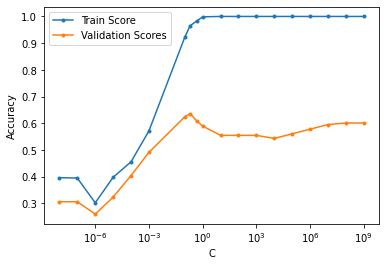

In [19]:
plt.figure()
plt.plot(C_range, train_scores_log,label="Train Score",marker='.')
plt.plot(C_range, validation_scores_log,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

The graph above shows that C = 0.1 gives the better accuracy and values larger than that make the model overfit.

In [58]:
# Fitting the model with the optimum C value:

    
# 1. Instantiate model
c_logit_opt = LogisticRegression(C = 0.2, random_state=10, max_iter=10000)

# 2. Fit model
c_logit_opt.fit(X_train_flat_Sp_ss, y_train_flat_Sp);

In [59]:
print(f'Score on train: {c_logit_opt.score(X_train_flat_Sp_ss, y_train_flat_Sp)}')
print(f'Score on validation: {c_logit_opt.score(X_val_flat_Sp_ss, y_val_flat_Sp)}')
print(f'Score on test: {c_logit_opt.score(X_test_flat_Sp_ss, y_test_flat_Sp)}')

Score on train: 0.9652677279305355
Score on validation: 0.6358381502890174
Score on test: 0.5625


In [60]:
from sklearn.metrics import confusion_matrix

y_pred = c_logit_opt.predict(X_test_flat_Sp_ss)

CM_log= confusion_matrix(y_test_flat_Sp, y_pred)

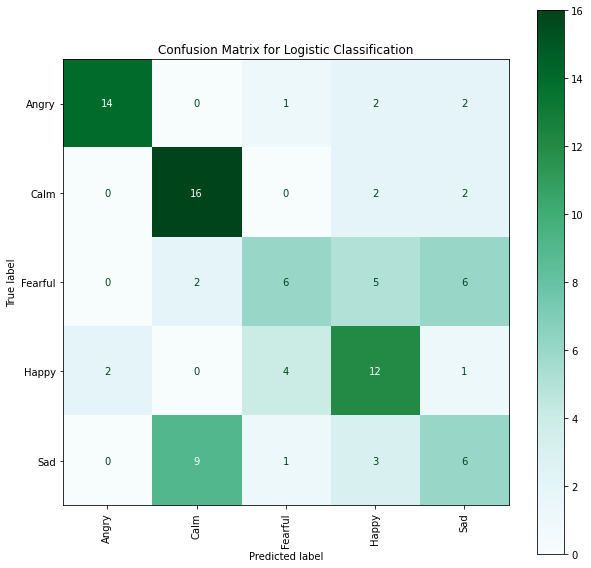

In [170]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM_log,
                                  display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for Logistic Classification')    
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='BuGn')
plt.show()

Logistic Regression had a test accuracy of 56% which is still better than guessing. But it performed well on predicting Angry and Calm labels.

#### 3.2.2 K-Nearest Neighbors

The KNN algorithm assumes that similar things exist in close proximity. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors

In [62]:
# Fitting the K-NN model:


K_range = range(1,20,2) # have odd number of neighbors.
for k in K_range:
    
# Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_flat_Sp_ss, y_train_flat_Sp)

# Score the model on the test set
    test_predictions = KNN_model.predict(X_test_flat_Sp_ss)
    
    
    test_accuracy = accuracy_score(test_predictions, y_test_flat_Sp)
    
    
   
    print(f"Test set accuracy: {test_accuracy}")

Test set accuracy: 0.71875
Test set accuracy: 0.65625
Test set accuracy: 0.5416666666666666
Test set accuracy: 0.5208333333333334
Test set accuracy: 0.5208333333333334
Test set accuracy: 0.4791666666666667
Test set accuracy: 0.46875
Test set accuracy: 0.4270833333333333
Test set accuracy: 0.4479166666666667
Test set accuracy: 0.4479166666666667


KNN had a better predicton compared to logistic classification. And the optimum number of neighbors is 3 with the test accuracy of 65%.

In [66]:
# fit the model with optimum K:

KNN_model_opt = KNeighborsClassifier(n_neighbors=3)
KNN_model_opt.fit(X_train_flat_Sp_ss, y_train_flat_Sp)



In [67]:
# plot the confusion matrix:

y_pred = KNN_model_opt.predict(X_test_flat_Sp_ss)

CM_KNN= confusion_matrix(y_test_flat_Sp, y_pred)

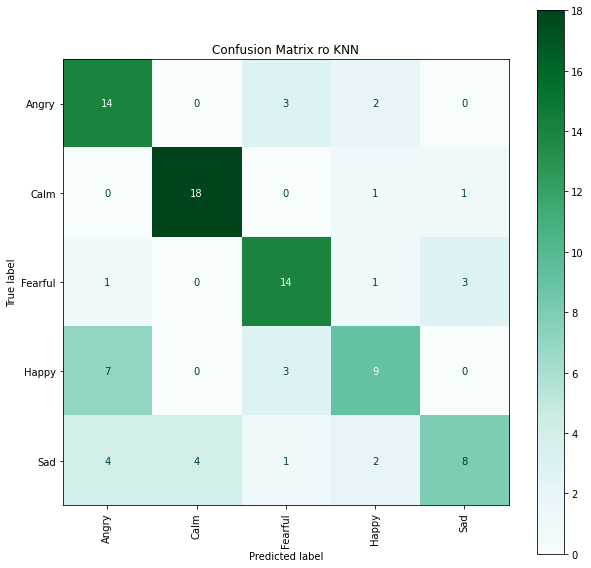

In [120]:
disp_K = ConfusionMatrixDisplay(confusion_matrix=CM_KNN,
                                  display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix ro KNN') 

disp = disp_K.plot(xticks_rotation='vertical', ax=ax, cmap='BuGn')
plt.show()

Although KNN had a better performance, it had a trouble picking the right labels for `Happy` and `Sad`. An interesting observation was that 21% of the time model labeled `Sad` audio file as `Angry`!
KNN model seemed to have a better performance in predicting the right label for `Fearful` files. 

#### 3.2.3 Principal Component Analysis

At this point, I want to see if PCA could improve the accuracy:

In [69]:
# Build and fit a PCA model to the data

# 1. Instantiate
my_pca = PCA(n_components=50)

# 2. Fit (mathematical calculations are made at this step) 
my_pca.fit(X_train_flat_Sp_ss)

# 3. Transform
X_train_flat_PCA = my_pca.transform(X_train_flat_Sp_ss)
X_val_flat_PCA = my_pca.transform(X_val_flat_Sp_ss)
X_test_flat_PCA = my_pca.transform(X_test_flat_Sp_ss)

In [70]:
expl_var = my_pca.explained_variance_ratio_

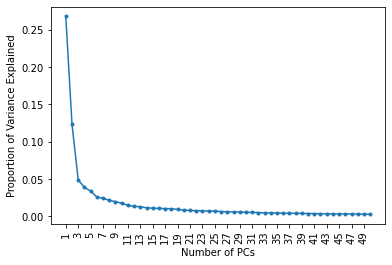

In [71]:
plt.figure()
plt.plot(range(1,51),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,51,2), rotation = 90)
plt.show()

In [72]:
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()
print(expl_var_cumulative[49])

0.871373512058898


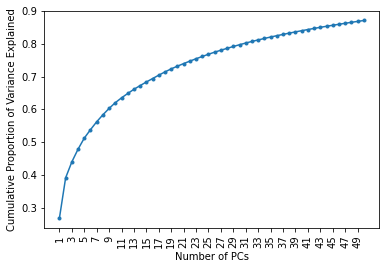

In [73]:
plt.figure()
plt.plot(range(1, 51), expl_var_cumulative, marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xticks(range(1, 51, 2), rotation =90)
plt.show()

As we can see, 50-component PCA explains 87% of the dataset variance. Now I fit the logistic classification on the new dataset to see if it helped the predition ability of the model.

In [80]:
# Fitting the model with the optimum C value on reduced-dimension X:

    
# 1. Instantiate model
c_logit_pca = LogisticRegression(C = 0.1, random_state=10, max_iter=10000)

# 2. Fit model
c_logit_pca.fit(X_train_flat_PCA , y_train_flat_Sp);

In [81]:
print(f'Score on train: {c_logit_pca.score(X_train_flat_PCA, y_train_flat_Sp)}')
print(f'Score on validation: {c_logit_pca.score(X_val_flat_PCA, y_val_flat_Sp)}')
print(f'Score on test: {c_logit_pca.score(X_test_flat_PCA, y_test_flat_Sp)}')

Score on train: 0.6396526772793053
Score on validation: 0.5202312138728323
Score on test: 0.4479166666666667


PCA did not help the model performnace and I decided to continue with the original dataset.

#### 3.2.4 Support Vectors Classifier

Support Vectors Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between sample points and the hyperplane.

In [112]:
#tunning the C parameter for svm:

from sklearn.svm import SVC

SVM_train_accuracy = []
SVM_validation_accuracy = [] 
C_Range = [0.001, 0.01, 0.1, 1,3 ,5, 8, 10, 100]

for c in C_Range:
    #Fit the kernel SVM
    kernel_SVM = SVC(random_state = 20, C = c)
    kernel_SVM.fit(X_train_flat_Sp_ss, y_train_flat_Sp)
    
    SVM_train_accuracy.append(kernel_SVM.score(X_train_flat_Sp_ss, y_train_flat_Sp))
    SVM_validation_accuracy.append(kernel_SVM.score(X_val_flat_Sp_ss, y_val_flat_Sp))


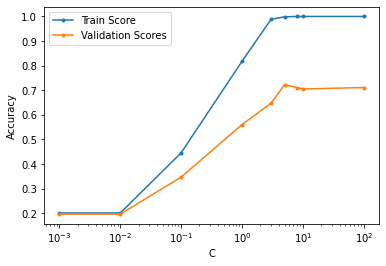

In [113]:
plt.figure()
plt.plot(C_Range, SVM_train_accuracy, label="Train Score", marker='.')
plt.plot(C_Range, SVM_validation_accuracy, label="Validation Scores", marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

According to the graph above, optimum value for C is 5. Now I will fit the SVM with the optimum C value and get confusion matrix:

In [110]:
# fit the SVM with optimum C:

kernel_SVM_opt = SVC(random_state = 20, C = 5)
kernel_SVM_opt.fit(X_train_flat_Sp_ss, y_train_flat_Sp)
    
print(f"Kernel SVM score (train): {kernel_SVM_opt.score(X_train_flat_Sp_ss, y_train_flat_Sp)}")
print(f"Kernel SVM score (validation): {kernel_SVM_opt.score(X_val_flat_Sp_ss, y_val_flat_Sp)}")
print(f"Kernel SVM score (test): {kernel_SVM_opt.score(X_test_flat_Sp_ss, y_test_flat_Sp)}")

Kernel SVM score (train): 0.9985528219971056
Kernel SVM score (validation): 0.7225433526011561
Kernel SVM score (test): 0.6875


Among the models that I have tried till now, SVM seemed to have the best performance with the accuracy of 68%.

In [114]:
y_pred_SVM = kernel_SVM_opt.predict(X_test_flat_Sp_ss)

CM_SVM= confusion_matrix(y_test_flat_Sp, y_pred_SVM)

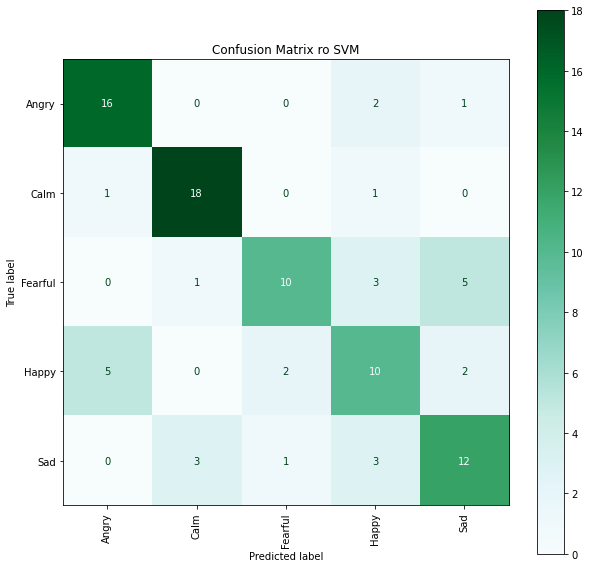

In [121]:
# Plotting the confusion matrix:

disp_SVM = ConfusionMatrixDisplay(confusion_matrix=CM_SVM,
                                  display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix ro SVM')    
disp = disp_SVM.plot(xticks_rotation='vertical', ax=ax, cmap='BuGn')
plt.show()

Based on the SVM confusion matrix, SVM had a better prection for all of the emotions except `Fearful`. 

#### 3.2.5 Decision Tree

Since my problem is a classification, I wanted to see how a decision tree would perform on predicting the target variable. The Decision Tree is built through a process known as binary recursive partitioning. This is an iterative process of splitting the data into partitions, and then splitting it up further on each of the branches

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [140]:

# Instantiate the decision stump and fit the model with optimum max_depth:

DT_model = DecisionTreeClassifier(max_depth=7, random_state =1)
DT_model.fit(X_train_flat_Sp_ss, y_train_flat_Sp)

print(f"The Train classification accuracy is:  {DT_model.score(X_train_flat_Sp_ss,y_train_flat_Sp)}")
print(f"The validation classification accuracy is:  {DT_model.score(X_val_flat_Sp_ss,y_val_flat_Sp)}")

The Train classification accuracy is:  0.8133140376266281
The validation classification accuracy is:  0.4624277456647399


As we can see, the decision tree does not perform as well as others.

#### 3.2.6 Convolutional Neural Network

CNN is a class of deep neural networks that is commonly applied to analyzing visual data. As mentioned in introduction part, most of the features that I have used for modeling are image-based features. The difference in the results are due to adding `sratify = y` argument to train test split.

In order to feed the X values into the CNN Model, the input shape has to have the (height, width, depth) format. The data have a height of 1, width of 128 (number of each feature), depth of 3 (number of features). Therefore, I needed to add a dimension, height, to my input.

In [33]:
# reshape the dataset to feed to CNN:

X_train_new = np.expand_dims(np.moveaxis(np.array(X_train_CNN_Sp_ss), 1, 2), 1)
X_val_new = np.expand_dims(np.moveaxis(np.array(X_val_CNN_Sp_ss), 1, 2), 1)
X_test_new = np.expand_dims(np.moveaxis(np.array(X_test_CNN_Sp_ss), 1, 2), 1)

In [34]:
np.shape(X_train_new)

(691, 1, 128, 3)

In [35]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(1, 3), activation='relu', input_shape=( 1,128,3)))
model.add(Conv2D(filters=32, kernel_size=(1, 3), activation='relu', input_shape=( 1,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

model.add(Conv2D(filters=64, kernel_size=(1, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=(1, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

#model.add(Conv2D(filters=128, kernel_size=(1, 3), padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(1, 3), padding='same',activation='relu'))
#model_s.add(MaxPooling2D(pool_size=(2, 2), padding='same'))




model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

In [36]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [37]:
history = model.fit(X_train_new, y_train_CNN_Sp,
                    batch_size=20,
                    validation_data=(X_val_new, y_val_CNN_Sp),
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 12ms/step - loss: 1.5877 - accuracy: 0.2402 - val_loss: 1.5095 - val_accuracy: 0.2948
Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: 1.4783 - accuracy: 0.3256 - val_loss: 1.4335 - val_accuracy: 0.3873
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: 1.4235 - accuracy: 0.3719 - val_loss: 1.3939 - val_accuracy: 0.3931
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 1.3477 - accuracy: 0.4052 - val_loss: 1.3342 - val_accuracy: 0.4335
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 1.3197 - accuracy: 0.4457 - val_loss: 1.3739 - val_accuracy: 0.3815
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 1.2676 - accuracy: 0.4544 - val_loss: 1.2156 - val_accuracy: 0.5260
Epoch 7/100
35/35 [==============================] - 0s 8ms/step - loss: 1.1522 - accuracy: 0.5297 - val_loss: 1.1635 - val_accuracy: 0.5318
Epoch 8/100


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 126, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 124, 32)        3104      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 62, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 62, 64)         6208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 31, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 31, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 31, 64)         1

In [39]:
score = model.evaluate(X_test_new, y_test_CNN_Sp)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 1.5516 - accuracy: 0.7396
Test loss: 1.5516042709350586
Test accuracy: 0.7395833134651184


As expected, CNN had a better performance compared to othe models. The reason for this could be the nature of the data, audio, that I was dealing with.

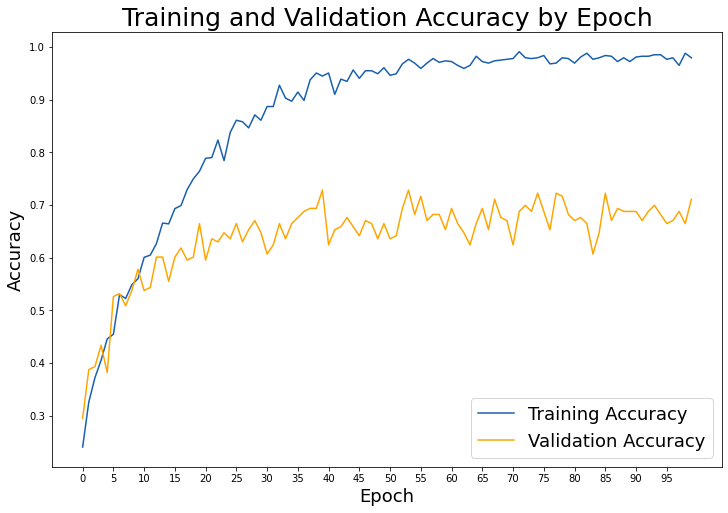

In [40]:
# Check the train accuracy and validation accuracy over epochs.

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);

As expected, CNN had a very good performance compared to the others. Behind the scenes, I have tried LeNet and VGG architectures and found that the architecture above works better.

I chose small kernel size for 2 reasons:
    - The size of the data is not big
    - I wanted to collect as much as local information as possible.

As we can, the CNN is trained after 35 Epochs.

In [41]:
Y_pred = model.predict(X_test_new)

In [44]:
matrix = confusion_matrix(y_test_CNN_Sp.values.argmax(axis=1), Y_pred.argmax(axis=1))

In [45]:
matrix

array([[15,  1,  0,  2,  1],
       [ 0, 20,  0,  0,  0],
       [ 0,  1, 13,  3,  2],
       [ 2,  0,  3, 14,  0],
       [ 0,  6,  2,  2,  9]])

In [46]:
 display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad']

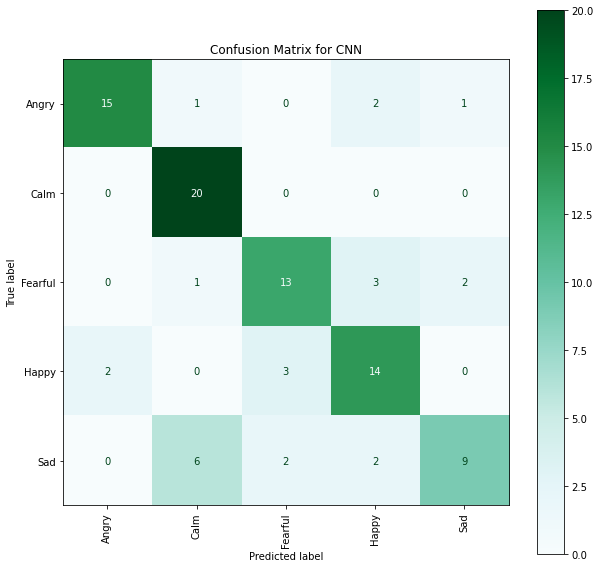

In [122]:
disp_t= ConfusionMatrixDisplay(confusion_matrix=matrix,
                                  display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad'])
fig, ax2 = plt.subplots(figsize=(10, 10))
ax2.set_title('Confusion Matrix for CNN')
    
disp = disp_t.plot(xticks_rotation='vertical', ax=ax2, cmap='BuGn')
plt.show()

Overall, the CNN model was successful at predicting most of the emotions except `Sad` emotion.

Comparing the results of the different models and their power of prediction:

KNN: had the best prediction for __Fearful__

SVM: had the best prediction for __Angry__ and __Sad__

CNN: had the best prediction for __Calm__ and __Happy__


Based on the above findings, an ensemble method  might help improve the prediction. If I had more time, I would built an ensemble model with different weights.
    

Just to have an overview:

In [177]:
Test_Accuracy =[0.46, 0.56, 0.65, 0.68, 0.74]

In [178]:
Model = ['DT', 'Log', 'KNN', 'SVM', 'CNN' ]

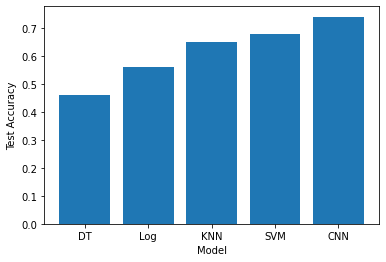

In [179]:
plt.figure()
plt.bar(Model,Test_Accuracy )
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.show()

### 3.3 Including song files

After doing the modeling with speech audio files, I wanted to see how a model that was trained on speech audio would perform on predicting the emotion of song files.

In [ ]:
First I need to split the song dataset into test and validation set

In [147]:
X_test_CNN_So_ss = features_song_CNN.copy()

In [148]:
# scaling the CNN feature for song audios:
# transform the song features with the same scaling function:

for i in range (0,np.shape(X_train_CNN_Sp)[1]):


    X_test_CNN_So_ss[i] = ss_CNN.transform(features_song_CNN[i].T).T

In [149]:
X_test_new_So = np.expand_dims(np.moveaxis(np.array(X_test_CNN_So_ss), 1, 2), 1)

In [154]:
score = model.evaluate(X_test_new_So, y_So)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

29/29 [==============================] - 0s 3ms/step - loss: 8.0947 - accuracy: 0.3630
Test loss: 8.094658851623535
Test accuracy: 0.36304348707199097


Although, The model trained and validated by Speech audios performed better than guessing but did poorly on predicting the emotion of song files. I wanted to see if there's an emotion that the model predicts it the best or the worst.

In [150]:
Y_pred_So = model.predict(X_test_new_So)

In [151]:
matrix_So = confusion_matrix(y_So.values.argmax(axis=1), Y_pred_So.argmax(axis=1))

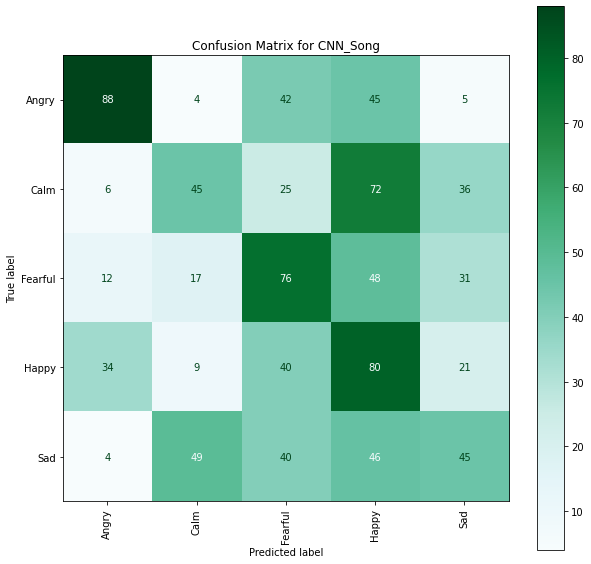

In [155]:
disp_S= ConfusionMatrixDisplay(confusion_matrix=matrix_So,
                                  display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad'])
fig, ax2 = plt.subplots(figsize=(10, 10))
ax2.set_title('Confusion Matrix for CNN_Song')
    
disp = disp_S.plot(xticks_rotation='vertical', ax=ax2, cmap='BuGn')
plt.show()

It seems that the model had more trouble recognizing the `Sad` and `Calm` emotions compared to the rest of them. I only changed the test set for the above evaluation. Now I wanted to see how test accuracy will change if I pick the validation set from song features.

In [160]:
# doing train, test split for flattened features:

X_val_CNN_So, X_test_CNN_So, y_val_CNN_So, y_test_CNN_So = train_test_split(features_song_CNN, y_So, test_size=0.5, random_state = 20, stratify = y_So)

In [162]:
# scaling the data:

for i in range (0,np.shape(X_train_CNN_Sp)[1]):


    X_test_CNN_So[i] = ss_CNN.transform( X_test_CNN_So[i].T).T
    X_val_CNN_So[i] = ss_CNN.transform( X_val_CNN_So[i].T).T

In [166]:
# Expanding the dimensions of Xs:

X_test_new_So = np.expand_dims(np.moveaxis(np.array(X_test_CNN_So), 1, 2), 1)
X_val_new_So = np.expand_dims(np.moveaxis(np.array(X_val_CNN_So), 1, 2), 1)

In [164]:

model_S = Sequential()

model_S.add(Conv2D(filters=32, kernel_size=(1, 3), activation='relu', input_shape=( 1,128,3)))
model_S.add(Conv2D(filters=32, kernel_size=(1, 3), activation='relu', input_shape=( 1,128,3)))
model_S.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

model_S.add(Conv2D(filters=64, kernel_size=(1, 3), padding='same',activation='relu'))
model_S.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_S.add(Dropout(0.1))

model_S.add(Conv2D(filters=64, kernel_size=(1, 3),padding='same', activation='relu'))
model_S.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_S.add(Dropout(0.25))

#model.add(Conv2D(filters=128, kernel_size=(1, 3), padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(0.5))

model_S.add(Conv2D(filters=128, kernel_size=(1, 3), padding='same',activation='relu'))
#model_s.add(MaxPooling2D(pool_size=(2, 2), padding='same'))




model_S.add(Flatten())
model_S.add(Dense(64, activation='relu'))
model_S.add(Dropout(0.2))

model_S.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))

model_S.add(Dense(5, activation='softmax'))

In [165]:
model_S.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [167]:
history = model.fit(X_train_new, y_train_CNN_Sp,
                    batch_size=20,
                    validation_data=(X_val_new_So , y_val_CNN_So),
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0385 - accuracy: 0.9855 - val_loss: 6.5321 - val_accuracy: 0.4217
Epoch 2/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0419 - accuracy: 0.9826 - val_loss: 6.9515 - val_accuracy: 0.4152
Epoch 3/100
35/35 [==============================] - 0s 10ms/step - loss: 0.0589 - accuracy: 0.9812 - val_loss: 5.5141 - val_accuracy: 0.4217
Epoch 4/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 0.9826 - val_loss: 6.5098 - val_accuracy: 0.3957
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0832 - accuracy: 0.9768 - val_loss: 7.4820 - val_accuracy: 0.3826
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0861 - accuracy: 0.9725 - val_loss: 6.8078 - val_accuracy: 0.4043
Epoch 7/100
35/35 [==============================] - 0s 8ms/step - loss: 0.1188 - accuracy: 0.9667 - val_loss: 7.3783 - val_accuracy: 0.3391
Epoch 8/10

In [169]:
score = model_S.evaluate(X_test_new_So, y_test_CNN_So)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

15/15 [==============================] - 0s 2ms/step - loss: 1.9266 - accuracy: 0.2000
Test loss: 1.9265642166137695
Test accuracy: 0.20000000298023224


I expected that having song validation in the modeling process would improve the test accuracy of the model but apparently It does not. It might need a deeper investigation to see the cause of low accuracy.

### 4.Conclusion

After constructing various models, I got the better performance for the emotion recognition task with CNN model. The model reached 74% accuracy for an unseen set of data. The model would have performed better with more data since after decreasing the test data size and allocating more data for training, the model trained better and had a better performance.

The project can be extended to integrate with the robot to help it to have a better understanding of the mood that the corresponding human is in, which will help it to have a better conversation as well as it can be integrated with various music applications to recommend songs to its users according to his/her emotions, it can also be used in various online shopping applications such as Amazon to improve the product recommendation for its users. 